<a href="https://colab.research.google.com/github/feresrafael/case-aed-reg/blob/main/geofusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação dos Dados

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
# DataFrame padrão
data = pd.read_csv('/content/drive/MyDrive/DesafioEstagioMachineLearning.csv', index_col=0)

# Plots Iniciais

In [ ]:
data.shape

(160, 22)

In [ ]:
data.describe

<bound method NDFrame.describe of                          nome          cidade  ... rendaMedia  faturamento
codigo                                         ...                        
3304557060           Abolição  Rio de Janeiro  ...     2501.0     932515.0
3304557138              Acari  Rio de Janeiro  ...      931.0     588833.0
3304557057         Água Santa  Rio de Janeiro  ...     2391.0     874200.0
3304557031  Alto Da Boa Vista  Rio de Janeiro  ...     3727.0     912226.0
3304557125           Anchieta  Rio de Janeiro  ...     1380.0     553020.0
...                       ...             ...  ...        ...          ...
3304557062        Vila Kosmos  Rio de Janeiro  ...     2316.0     901446.0
3304557093       Vila Militar  Rio de Janeiro  ...     2416.0     849731.0
3304557091     Vila Valqueire  Rio de Janeiro  ...     3189.0    1127042.0
3304557065       Vista Alegre  Rio de Janeiro  ...     2418.0     921875.0
3304557110              Zumbi  Rio de Janeiro  ...     3791.0     

In [ ]:
data.head()

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
codigo,,,,,,,,,,,,,,,,,,,,,,
3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0
3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0
3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0
3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0
3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0


In [ ]:
data.dtypes

nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
domiciliosC1      int64
domiciliosC2      int64
domiciliosD       int64
domiciliosE       int64
rendaMedia      float64
faturamento     float64
dtype: object

In [ ]:
data.sort_values(by='domiciliosA1', ascending = False)

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
codigo,,,,,,,,,,,,,,,,,,,,,,
3304557131,Barra Da Tijuca,Rio de Janeiro,RJ,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0
3304557018,Copacabana,Rio de Janeiro,RJ,150524,8562,3727,6383,9168,21814,27567,21858,51445,5740,9218,19350,13160,10982,5482,998,5122,7381.0,2384494.0
3304557020,Leblon,Rio de Janeiro,RJ,47342,3134,1380,2131,2390,6177,9519,7181,15430,5423,3532,5342,1863,1890,917,217,1595,14738.0,2119774.0
3304557030,Tijuca,Rio de Janeiro,RJ,168267,13033,6405,9750,10968,23657,33313,23892,47249,4351,8306,19076,11631,10755,6539,1280,3723,7844.0,2157079.0
3304557019,Ipanema,Rio de Janeiro,RJ,43948,3061,1311,1957,2395,5854,8665,6344,14361,4213,3432,4478,2323,2141,1369,117,1460,17188.0,1962438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304557051,Engenho Novo,Rio de Janeiro,RJ,43362,4830,2351,3163,3232,6691,9332,5771,7992,0,549,2376,3059,3959,2559,498,2109,2325.0,932007.0
3304557056,Engenho De Dentro,Rio de Janeiro,RJ,46584,4626,2233,3107,3259,6866,9607,6492,10394,0,572,2451,3272,4174,4040,384,1815,2260.0,903559.0
3304557150,Engenho Da Rainha,Rio de Janeiro,RJ,27411,3235,1634,2037,1879,4404,5649,3510,5063,0,0,839,1908,2747,1885,356,1746,1620.0,805559.0


In [ ]:
import seaborn as sns

%matplotlib inline

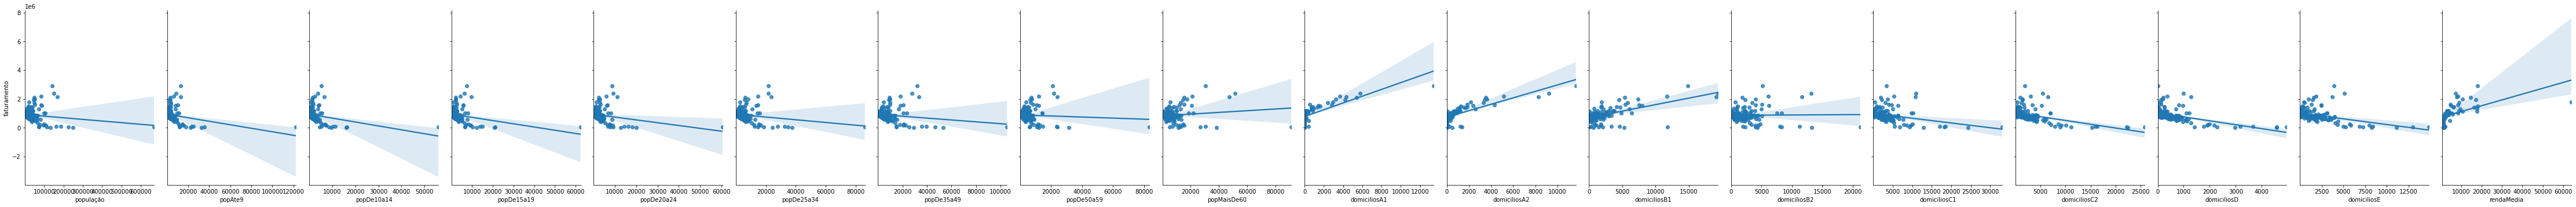

In [ ]:
sns.pairplot(data, x_vars=['população', 'popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia'], y_vars='faturamento', height=5, aspect=0.7, kind='reg')

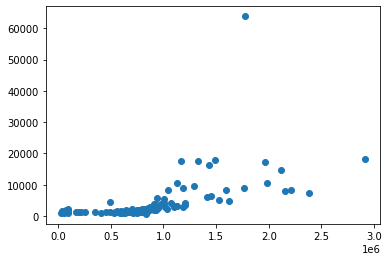

In [ ]:
import matplotlib.pyplot as plt 
x = data['faturamento']
y = data['rendaMedia']
plt.scatter(x, y); plt.show()

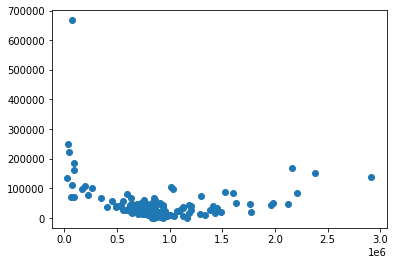

In [ ]:
import matplotlib.pyplot as plt 
x = data['faturamento']
y = data['população']
plt.scatter(x, y); plt.show()

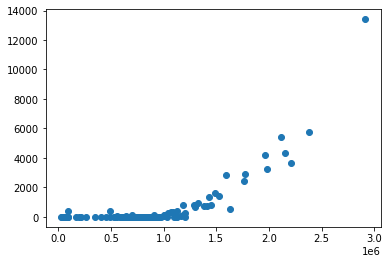

In [ ]:
import matplotlib.pyplot as plt
x = data['faturamento']
y = data['domiciliosA1']
plt.scatter(x, y); plt.show()

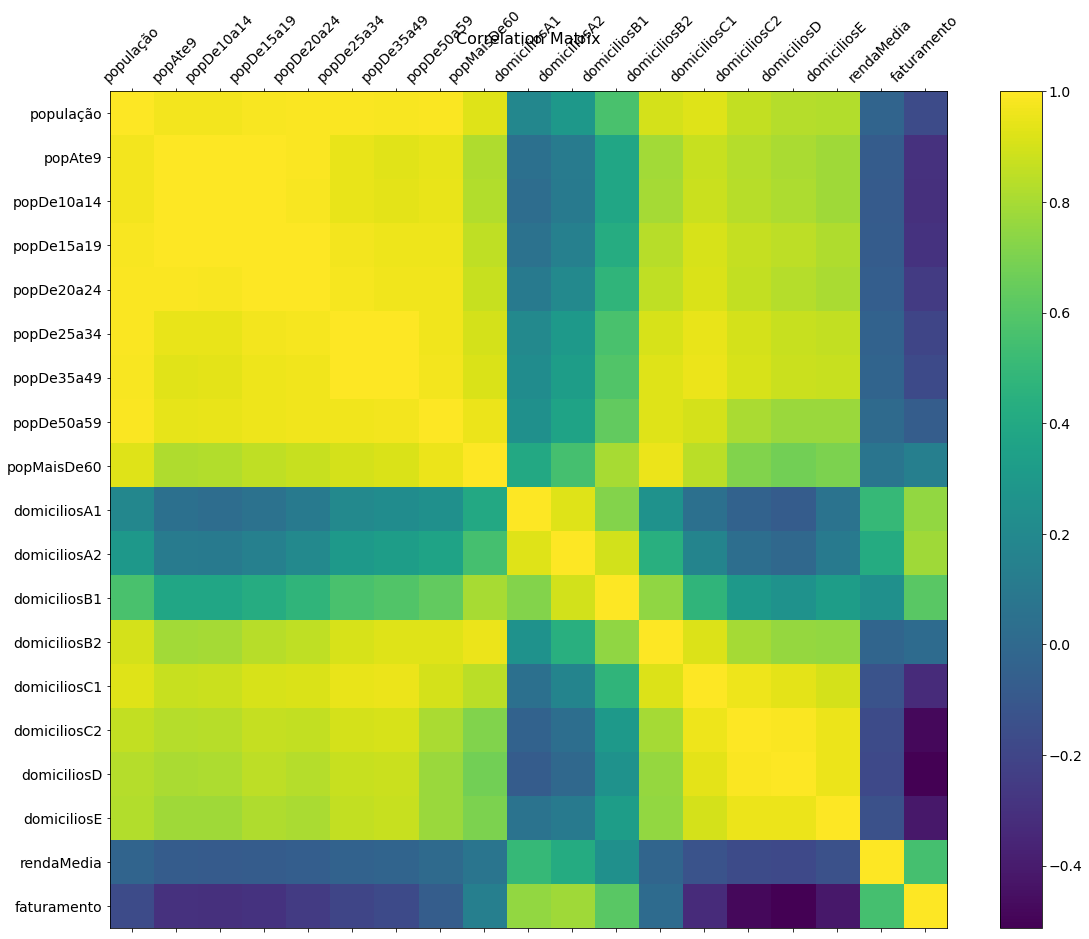

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Bairros com maior fatutameto

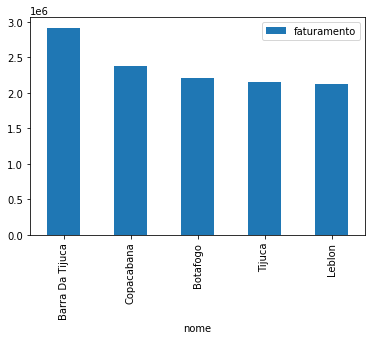

In [ ]:
dtop = data.nlargest(5, 'faturamento')
# a simple line plot
dtop.plot(kind='bar',x='nome',y='faturamento')

Bairros com maior Renda Média

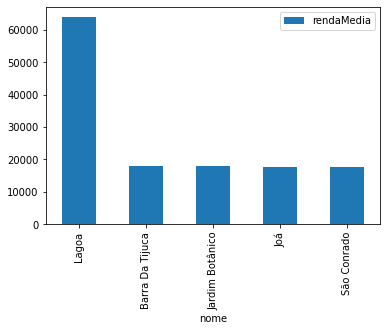

In [ ]:
dtop = data.nlargest(5, 'rendaMedia')
# a simple line plot
dtop.plot(kind='bar',x='nome',y='rendaMedia')

# Tratamento de Dados

In [ ]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
longitude = []
latitude = []
   

def findGeocode(nome):
       

    try:
          

        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(nome)
      
    except GeocoderTimedOut:
          
        return findGeocode(nome)    
  

for i in (data["nome"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          

        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       

    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [ ]:
data["Latitude"] = latitude
data["Longitude"] = longitude

data

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,Latitude,Longitude
codigo,,,,,,,,,,,,,,,,,,,,,,,,
3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0,-22.886161,-43.299846
3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0,-22.822153,-43.340674
3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0,-28.177530,-52.036030
3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0,-23.641625,-46.699434
3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0,-20.805767,-40.645456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304557062,Vila Kosmos,Rio de Janeiro,RJ,18791,1802,921,1442,1462,2500,3944,2920,3800,0,259,774,1363,1923,1379,190,405,2316.0,901446.0,-22.853597,-43.303202
3304557093,Vila Militar,Rio de Janeiro,RJ,13556,1888,787,1042,982,2542,2908,1528,1879,0,219,714,828,1051,1012,116,465,2416.0,849731.0,-22.860348,-43.402893
3304557091,Vila Valqueire,Rio de Janeiro,RJ,33190,3166,1619,2255,2326,4752,7183,4950,6939,0,906,2866,2241,2982,1200,360,772,3189.0,1127042.0,-22.888609,-43.365776


In [ ]:
data.to_csv('DesafioEstagioMachineLearningLL.csv')

In [ ]:
# DataFrame tratado que contém Latitude e Longitude dos bairros
datall = pd.read_csv('/content/drive/MyDrive/DesafioEstagioMachineLearningLL.csv', index_col=0)

In [ ]:
datall.head()

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,Latitude,Longitude
codigo,,,,,,,,,,,,,,,,,,,,,,,,
3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0,-22.886161,-43.299846
3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0,-22.822153,-43.340674
3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0,-28.177530,-52.036030
3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0,-23.641625,-46.699434
3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0,-20.805767,-40.645456


In [ ]:
pip install geopy

Mapa de densidade Faturamento por Bairro

In [ ]:
import plotly.express as px

In [ ]:
fig = px.density_mapbox(datall, lat='Latitude', lon='Longitude', z='faturamento', hover_name='nome', radius=10,
                        center=dict(lat=-22.9035, lon=-43.2096), zoom=10,
                        mapbox_style="stamen-terrain")
fig.show()

# Modelo de Regressão

In [ ]:
# DataFrame padrão
data = pd.read_csv('/content/drive/MyDrive/DesafioEstagioMachineLearning.csv', index_col=0)

In [ ]:
data.isnull().sum()

nome            0
cidade          0
estado          0
população       0
popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      6
faturamento     0
dtype: int64

In [ ]:
data.columns

Index(['nome', 'cidade', 'estado', 'população', 'popAte9', 'popDe10a14',
       'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59',
       'popMaisDe60', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1',
       'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD',
       'domiciliosE', 'rendaMedia', 'faturamento'],
      dtype='object')

In [ ]:
feature_cols = ['população', 'popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia']

In [ ]:
# Seis linhas que a Renda Media encontrava-se nula precisaram ser retiradas para o modelo de regressão
X = data[feature_cols]
X = X.dropna(subset=['rendaMedia'])

In [ ]:
X

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia
codigo,,,,,,,,,,,,,,,,,,
3304557060,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0
3304557138,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0
3304557057,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0
3304557031,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0
3304557125,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304557062,18791,1802,921,1442,1462,2500,3944,2920,3800,0,259,774,1363,1923,1379,190,405,2316.0
3304557093,13556,1888,787,1042,982,2542,2908,1528,1879,0,219,714,828,1051,1012,116,465,2416.0
3304557091,33190,3166,1619,2255,2326,4752,7183,4950,6939,0,906,2866,2241,2982,1200,360,772,3189.0


In [ ]:
X.isnull().any()
#np.any(np.isinf(X))

população       False
popAte9         False
popDe10a14      False
popDe15a19      False
popDe20a24      False
popDe25a34      False
popDe35a49      False
popDe50a59      False
popMaisDe60     False
domiciliosA1    False
domiciliosA2    False
domiciliosB1    False
domiciliosB2    False
domiciliosC1    False
domiciliosC2    False
domiciliosD     False
domiciliosE     False
rendaMedia      False
dtype: bool

In [ ]:
model_cols = ['população', 'popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia', 'faturamento']
dpn = data[model_cols]
dpn = dpn.dropna(subset=['rendaMedia'])
y = dpn.faturamento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

modelreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
modelreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = modelreg.predict(X_test)

Métricas de Performance do Modelo

In [ ]:
# Mean squared error
import sklearn.metrics as metrics

print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

146132.85318504946
